# importing libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

## reading the dataset

In [19]:
data=pd.read_csv("Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## counting rows and columns

In [5]:
data.shape

(2200, 8)

## counting null values

In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data['label'].value_counts()

jute           100
rice           100
apple          100
coconut        100
banana         100
cotton         100
maize          100
watermelon     100
mango          100
pigeonpeas     100
blackgram      100
muskmelon      100
grapes         100
orange         100
papaya         100
mungbean       100
kidneybeans    100
coffee         100
lentil         100
chickpea       100
pomegranate    100
mothbeans      100
Name: label, dtype: int64

## data visualization

In [8]:
print("average ratio of nitrogen in soil: {0:.2f}", format(data["N"].mean()))
print("average ratio of phosphorous in soil: {0:.2f}", format(data["P"].mean()))
print("average ratio of potassium in soil: {0:.2f}", format(data["K"].mean()))
print("average temperature in celsius: {0:.2f}", format(data["temperature"].mean()))
print("average relative humidity in %: {0:.2f}", format(data["humidity"].mean()))
print("average ph value: {0:.2f}", format(data["ph"].mean()))
print("average rainfall in mm: {0:.2f}", format(data["rainfall"].mean()))

average ratio of nitrogen in soil: {0:.2f} 50.551818181818184
average ratio of phosphorous in soil: {0:.2f} 53.36272727272727
average ratio of potassium in soil: {0:.2f} 48.14909090909091
average temperature in celsius: {0:.2f} 25.616243851779533
average relative humidity in %: {0:.2f} 71.48177921778648
average ph value: {0:.2f} 6.469480065256369
average rainfall in mm: {0:.2f} 103.46365541576832


In [9]:
@interact
def summary(crops= list(data['label'].value_counts().index)):
    x=data[data['label']== crops]
    print("-------------------------------------")
    print('statistics for nitrogen')
    print("minimum nitrogen required :", x['N'].min())
    print("average nitrogen required :", x['N'].mean())
    print("maximum nitrogen required :", x['N'].max())
    print("--------------------------------------")
    print("statistics for phosphorous")
    print("minimum phosphorous required :", x['P'].min())
    print("average phosphorous required :", x['P'].mean())
    print("maximum phosphorous required :", x['P'].max())
    print("--------------------------------------")
    print("statistics for potassium")
    print("minimum potassium required :", x['K'].min())
    print("average potassium required :", x['K'].mean())
    print("maximum potassium required :", x['K'].max())
    print("--------------------------------------")
    print("statistics for temperature")
    print("minimum temperature required : {0:.2f}".format(x['temperature'].min()))
    print("average temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("maximum temperature required : {0:.2f}".format(x['temperature'].max()))
    print("--------------------------------------")
    print("statistics for humidity")
    print("minimum humidity required : {0:.2f}".format(x['humidity'].min()))
    print("average humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("maximum humidity required : {0:.2f}".format(x['humidity'].max()))
    print("--------------------------------------")
    print("statistics for PH")
    print("minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("average PH required : {0:.2f}".format(x['ph'].mean()))
    print("maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("--------------------------------------")
    print("statistics for rainfall")
    print("minimum rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("average rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("maximum rainfall required : {0:.2f}".format(x['rainfall'].max()))
    
    
    
    
    
    
    
    
    

interactive(children=(Dropdown(description='crops', options=('jute', 'rice', 'apple', 'coconut', 'banana', 'co…

In [10]:
@interact
def compare(conditions= ['N','P','K','temperature','ph','humidity','rainfall']):
    print("crops which require more than average", conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("---------------------------------------------------------------")
    print("crops which require below than average", conditions, '\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())


interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

## plotting the graphs to show crops 


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

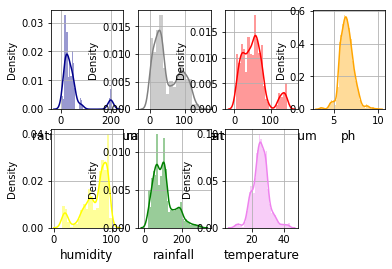

In [11]:
plt.subplot(2,4,1)
sns.distplot(data['K'], color='darkblue')
plt.xlabel('ratio of potassium', fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['N'], color='grey')
plt.xlabel('ratio of nitrogen', fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['P'], color='red')
plt.xlabel('ratio of potassium', fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['ph'], color='orange')
plt.xlabel('ph', fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['humidity'], color='yellow')
plt.xlabel('humidity', fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['rainfall'], color='green')
plt.xlabel('rainfall', fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['temperature'], color='violet')
plt.xlabel('temperature', fontsize=12)
plt.grid()

plt.subtitle("distribution of agricultural conditions", fontsize=20)
plt.show()

In [12]:
print("some interesting patterns")

print("crops which require very high ratio of nitrogen in soil :", data[data['N']> 120]['label'].unique())
print("crops which require very high ratio of phosphorous in soil :", data[data['P']> 100]['label'].unique())
print("crops which require very high ratio of potassium in soil :", data[data['K']> 200]['label'].unique())
print("crops which require very high rainfall :", data[data['rainfall']> 200]['label'].unique())
print("crops which require very high temperature :", data[data['temperature']> 40]['label'].unique())
print("crops which require very low temperature :", data[data['temperature']< 10]['label'].unique())
print("crops which require very high ph :", data[data['ph']> 9]['label'].unique())
print("crops which require very low ph :", data[data['ph']< 4]['label'].unique())
print("crops which require very low humidity :", data[data['humidity']< 20]['label'].unique())

some interesting patterns
crops which require very high ratio of nitrogen in soil : ['cotton']
crops which require very high ratio of phosphorous in soil : ['grapes' 'apple']
crops which require very high ratio of potassium in soil : ['grapes' 'apple']
crops which require very high rainfall : ['rice' 'papaya' 'coconut']
crops which require very high temperature : ['grapes' 'papaya']
crops which require very low temperature : ['grapes']
crops which require very high ph : ['mothbeans']
crops which require very low ph : ['mothbeans']
crops which require very low humidity : ['chickpea' 'kidneybeans']


## declaring dependent and independent variables

In [13]:
y=data['label']
x=data.drop(['label'], axis=1)

## splitting the data into train and test

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

## training the model

In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## prediction of crops

In [17]:
prediction=model.predict((np.array([[90,
                                     40,
                                      40,
                                      20,
                                      80,
                                       7,
                                    200]])))
print("the suggestion of crop for given climatuic condition is :", prediction)

the suggestion of crop for given climatuic condition is : ['rice']
